In [1]:
import os, shutil
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
'''
    Original and new dirs for subset of image data
'''
original_dataset_dir_train = 'C://Users//Vishaal//PycharmProjects//Learning Keras//dogs-vs-cats//train//train'
original_dataset_dir_test = 'C://Users//Vishaal//PycharmProjects//Learning Keras//dogs-vs-cats//test1//test1'
base_dir = 'C://Users//Vishaal//PycharmProjects//Learning Keras//cats_and_dogs_small'
#os.mkdir(base_dir)

In [3]:
'''
    Create train directory
'''
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

In [4]:
'''
    Create validation dir
'''
val_dir = os.path.join(base_dir, 'val')
#os.mkdir(val_dir)

In [5]:
'''
    Create the test directory
'''
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [6]:
'''
    Cats and dogs folder in train
'''
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

In [7]:
'''
    Cats and dogs folder in validation folder
'''
val_cats_dir = os.path.join(val_dir, 'cats')
#os.mkdir(val_cats_dir)
val_dogs_dir = os.path.join(val_dir, 'dogs')
#os.mkdir(val_dogs_dir)

In [8]:
'''
    Cats and dogs folder in test folder
'''
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [11]:
'''
    Copy 1000 cat and dog images into subset train set
'''
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train,fname)
    des = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src, des)
    
    

In [35]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train,fname)
    des = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src, des)

In [42]:
'''
    Copy 500 cat and dog images into subset val set
'''
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train,fname)
    des = os.path.join(val_cats_dir,fname)
    shutil.copyfile(src, des)

In [43]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train,fname)
    des = os.path.join(val_dogs_dir,fname)
    shutil.copyfile(src, des)


In [44]:
'''
    Copy 500 cat and dog images into subset test set
'''
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train,fname)
    des = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src, des)


In [45]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train,fname)
    des = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src, des)

In [9]:
'''
    Count of number of images
'''
print('Total training cat images = ', len(os.listdir(train_cats_dir)))
print('Total training dog images = ', len(os.listdir(train_dogs_dir)))
print('Total validation cat images = ', len(os.listdir(val_cats_dir)))
print('Total validation cat images = ', len(os.listdir(val_dogs_dir)))
print('Total test cat images = ', len(os.listdir(test_cats_dir)))
print('Total test cat images = ', len(os.listdir(test_dogs_dir)))

Total training cat images =  1000
Total training dog images =  1000
Total validation cat images =  500
Total validation cat images =  500
Total test cat images =  500
Total test cat images =  500


In [10]:
'''
    Covnet architecture
'''
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [11]:
model.compile(loss = 'binary_crossentropy', metrics=['acc'], optimizer = 'rmsprop')

In [12]:
'''
    Pre-processing the images
    First we create a python a class ImageDataGenerator that will take care of all the preprocessing. This class is in
    in the keras.preprocessing.image library.
'''
train_datagen = ImageDataGenerator(rescale=(1./255))
test_datagen = ImageDataGenerator(rescale=(1./255))

In [13]:
'''
    We use a python concept known as a generator. This basically takes an image and iterates an operation.
    train_dir is the destination directory in this case and we set target size as (150,150) to make all images uniform.
    Finally, we set class_mode as binary so that all images have a binary label
'''
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
'''
    Checking if the generator is doing its job
'''
for img, lab in train_generator:
    print('Shape of images batch is', img.shape)
    print('Shape of label batch is', lab.shape)
    break

Shape of images batch is (20, 150, 150, 3)
Shape of label batch is (20,)


In [16]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10, validation_data = validation_generator, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 192s 2s/step - loss: 0.7023 - acc: 0.5220 - val_loss: 0.7043 - val_acc: 0.5220
Epoch 2/10
100/100 [==============================] - 182s 2s/step - loss: 0.6833 - acc: 0.5875 - val_loss: 0.6706 - val_acc: 0.5970
Epoch 3/10
100/100 [==============================] - 185s 2s/step - loss: 0.6421 - acc: 0.6575 - val_loss: 0.5535 - val_acc: 0.6870
Epoch 4/10
100/100 [==============================] - 166s 2s/step - loss: 0.5694 - acc: 0.7130 - val_loss: 0.5841 - val_acc: 0.6770
Epoch 5/10
100/100 [==============================] - 176s 2s/step - loss: 0.5211 - acc: 0.7440 - val_loss: 0.4551 - val_acc: 0.7000
Epoch 6/10
100/100 [==============================] - 196s 2s/step - loss: 0.5084 - acc: 0.7685 - val_loss: 0.6046 - val_acc: 0.7370
Epoch 7/10
100/100 [==============================] - 197s 2s/step - loss: 0.4161 - acc: 0.8005 - val_loss: 0.4018 - val_acc: 0.7330
Epoch 8/10
100/100 [==============================] - 167s 2s/step - 

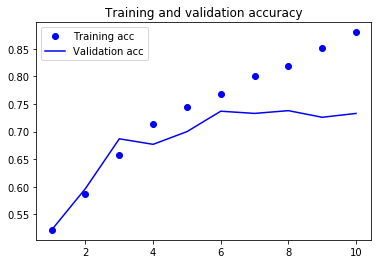

In [19]:
'''
    Plotting Evaluation curves - Ideally, we should run this for more epochs but takes too long. 
'''
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


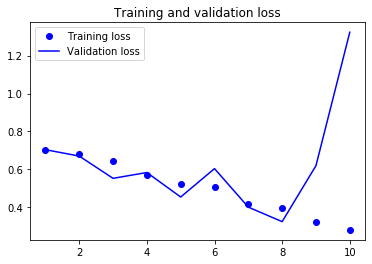

In [20]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
'''
    We will now implement data augmentation. In this case we have about 2000 images so overfitting is a
    concern. Data augmentation is another technique to reduce overfitting analogous to dropouts and 
    weight decay
'''

